# Baseline - This is implementation using dense layers as input and output, with one hidden layer of 512 neurons. 


In [21]:
from __future__ import print_function

import cv2
import numpy as np
from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K

K.set_image_dim_ordering('tf')  # Tensor Flow dimension ordering in this code
img_rows = 64
img_cols = 80

smooth = 1.


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)




In [28]:
import cv2
import numpy as np
from keras.models import Model
from keras.layers import Activation, Dense
from keras.optimizers import SGD, RMSprop
#model.compile(optimizer=rmsprop, loss='binary_crossentropy')
#model.compile(optimizer='adam', loss=dice_coef_loss, metric='accuracy',dim_ordering="th")
#metrics={'outbin': 'accuracy'}

#model.compile(optimizer='adam', loss='binary_crossentropy',metrics={'output_a': 'accuracy'}
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D,Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from matplotlib.pyplot import imshow
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

K.set_image_dim_ordering('th')  # Tensor Flow dimension ordering in this code
img_rows = 64
img_cols = 80


from __future__ import print_function

import os
import numpy as np

import cv2

data_path = '/home/ubuntu/midterm/raw/'

image_rows = 420
image_cols = 580


train_data_path = os.path.join(data_path, 'train')
images = os.listdir(train_data_path)
total = len(images) // 2
#5635

imgs = np.ndarray((total, 1, image_rows, image_cols), dtype=np.uint8)
imgs_mask = np.ndarray((total, 1, image_rows, image_cols), dtype=np.uint8)

i = 0
print('-'*30)
print('Creating training images...')
print('-'*30)
for image_name in images:
    if 'mask' in image_name:
        continue
    image_mask_name = image_name.split('.')[0] + '_mask.tif'
    img = cv2.imread(os.path.join(train_data_path, image_name), cv2.IMREAD_GRAYSCALE)
    img_mask = cv2.imread(os.path.join(train_data_path, image_mask_name), cv2.IMREAD_GRAYSCALE)

    img = np.array([img])
    img_mask = np.array([img_mask])

    imgs[i] = img
    imgs_mask[i] = img_mask

    if i % 100 == 0:
        print('Done: {0}/{1} images'.format(i, total))
    i += 1
print('Loading done.')

np.save('imgs_train.npy', imgs)
np.save('imgs_mask_train.npy', imgs_mask)
print('Saving to .npy files done.')




train_data_path = os.path.join(data_path, 'test')
images = os.listdir(train_data_path)
total = len(images)

imgs = np.ndarray((total, 1, image_rows, image_cols), dtype=np.uint8)
imgs_id = np.ndarray((total, ), dtype=np.int32)

i = 0
print('-'*30)
print('Creating test images...')
print('-'*30)
for image_name in images:
    img_id = int(image_name.split('.')[0])
    img = cv2.imread(os.path.join(train_data_path, image_name), cv2.IMREAD_GRAYSCALE)

    img = np.array([img])

    imgs[i] = img
    imgs_id[i] = img_id

    if i % 100 == 0:
        print('Done: {0}/{1} images'.format(i, total))
    i += 1
print('Loading done.')

np.save('imgs_test.npy', imgs)
np.save('imgs_id_test.npy', imgs_id)
print('Saving to .npy files done.')





------------------------------
Creating training images...
------------------------------
Done: 0/5635 images
Done: 100/5635 images
Done: 200/5635 images
Done: 300/5635 images
Done: 400/5635 images
Done: 500/5635 images
Done: 600/5635 images
Done: 700/5635 images
Done: 800/5635 images
Done: 900/5635 images
Done: 1000/5635 images
Done: 1100/5635 images
Done: 1200/5635 images
Done: 1300/5635 images
Done: 1400/5635 images
Done: 1500/5635 images
Done: 1600/5635 images
Done: 1700/5635 images
Done: 1800/5635 images
Done: 1900/5635 images
Done: 2000/5635 images
Done: 2100/5635 images
Done: 2200/5635 images
Done: 2300/5635 images
Done: 2400/5635 images
Done: 2500/5635 images
Done: 2600/5635 images
Done: 2700/5635 images
Done: 2800/5635 images
Done: 2900/5635 images
Done: 3000/5635 images
Done: 3100/5635 images
Done: 3200/5635 images
Done: 3300/5635 images
Done: 3400/5635 images
Done: 3500/5635 images
Done: 3600/5635 images
Done: 3700/5635 images
Done: 3800/5635 images
Done: 3900/5635 images
Do

------------------------------
Loading train and train masks...
------------------------------
------------------------------
Loading test and test IDs masks...
------------------------------
shape of the train images before preprocesing:
420 580
shape of train masks before preprocesing:
420 580
shape of the array after preprocesing:
64 80
shape of train masks after preprocesing:
64 80
Mean of images: 99.7703
Std Deviation of images: 56.7396
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


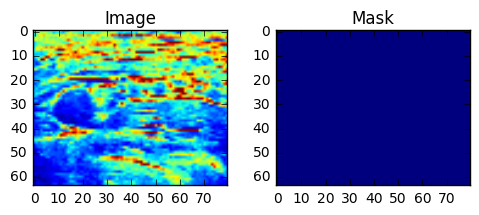

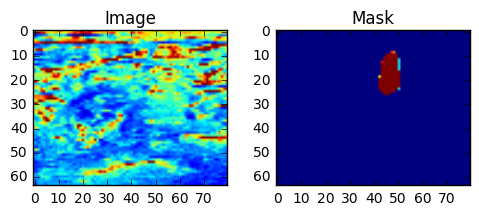

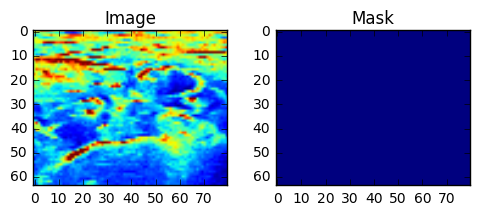

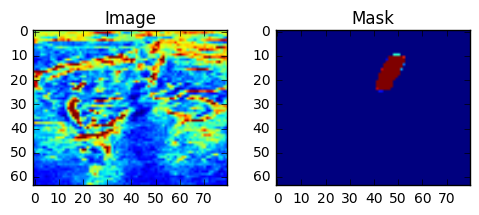

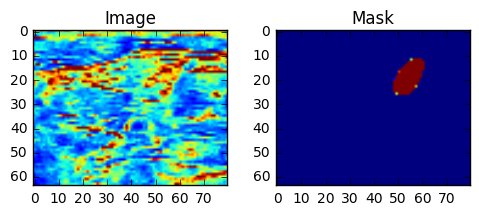

In [30]:
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D,Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from matplotlib.pyplot import imshow
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

K.set_image_dim_ordering('th')  # Tensor Flow dimension ordering in this code
img_rows = 64
img_cols = 80


print('-'*30)
print('Loading train and train masks...')
print('-'*30)
imgs_train = np.load('imgs_train.npy')
imgs_mask_train = np.load('imgs_mask_train.npy')
print('-'*30)
print('Loading test and test IDs masks...')
print('-'*30)

imgs_test = np.load('imgs_test.npy')
imgs_id_test = np.load('imgs_id_test.npy')
#shape[0] = 50. The number of images read into the array
print("shape of the train images before preprocesing:")
print(imgs_train[1,0].shape[0],imgs_train[1,0].shape[1])
print("shape of train masks before preprocesing:")
print(imgs_mask_train[1,0].shape[0],imgs_mask_train[1,0].shape[1])
def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], imgs.shape[1], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i, 0] = cv2.resize(imgs[i, 0], (img_cols, img_rows), interpolation=cv2.INTER_CUBIC)
    return imgs_p

#preprocess
imgs_train = preprocess(imgs_train)
imgs_mask_train= preprocess(imgs_mask_train)
print("shape of the array after preprocesing:")
print(imgs_train[1,0].shape[0],imgs_train[1,0].shape[1])
print("shape of train masks after preprocesing:")
print(imgs_mask_train[1,0].shape[0],imgs_mask_train[1,0].shape[1])

imgs_train = imgs_train.astype('float32')

mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalizati
print("Mean of images:",mean)
print("Std Deviation of images:",std)

imgs_train -= mean
imgs_train /= std

imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255.  # scale masks to [0, 1]
print(imgs_mask_train[1,0])


#imgs_mask_test_1/= 255.  # scale masks to [0, 1]
import pylab as pl

for i in range(5):
    pl.figure(figsize=(12, 2))
    pl.subplot(141)
    pl.title('Image')
    pl.imshow(imgs_train[i,0].squeeze())
    pl.subplot(142)
    pl.title('Mask')
    pl.imshow(imgs_mask_train[i,0].squeeze())
    pyplot.show()

In [34]:
from __future__ import print_function

import cv2
import numpy as np
from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K

K.set_image_dim_ordering('tf')  # Tensor Flow dimension ordering in this code
img_rows = 64
img_cols = 80

smooth = 1.



def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


In [31]:
print('-'*30)
print('preprocessing test data...')
print('-'*30)
imgs_test = preprocess(imgs_test)

------------------------------
preprocessing test data...
------------------------------


In [33]:
imgs_train_vector = imgs_train.reshape(5635,5120)
imgs_train_label_vector = imgs_mask_train.reshape(5635,5120)
imgs_test_vector = imgs_test.reshape(5508,5120)


In [ ]:
# import numpy as np
from keras.utils.layer_utils import print_summary
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

model = Sequential()
model.add(Dense(5120, input_shape=(5120,)))
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(5120))

model.compile(optimizer='adam', loss=[dice_coef_loss],metrics=[dice_coef])
print_summary(model.layers)  

In [81]:

#imgs_mask_test_1/= 255.  # scale masks to [0, 1]
import pylab as pl
from keras.models import Model 

print('-'*30)
print('Fitting model...')
print('-'*30)
x = model.fit(imgs_train_vector, imgs_train_label_vector,
          batch_size=128, nb_epoch=200,
          show_accuracy=True, verbose=1)
print(x.history)

imgs_mask_test = model.predict(imgs_test_vector, verbose=1)
np.save('imgs_mask_test.npy', imgs_mask_test)


------------------------------
Fitting model...
------------------------------
Epoch 1/200


/home/ubuntu/anaconda3/lib/python3.5/site-packages/keras/models.py:610: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


5635/5635 [==============================] - 21s - loss: 0.4150 - dice_coef: -0.4150    
Epoch 2/200
5635/5635 [==============================] - 21s - loss: -0.0016 - dice_coef: 0.0016    
Epoch 3/200
5635/5635 [==============================] - 21s - loss: -0.0035 - dice_coef: 0.0035    
Epoch 4/200
5635/5635 [==============================] - 21s - loss: -0.0091 - dice_coef: 0.0091    
Epoch 5/200
5635/5635 [==============================] - 21s - loss: -0.0302 - dice_coef: 0.0302    
Epoch 6/200
5635/5635 [==============================] - 21s - loss: -8.0678e-04 - dice_coef: 8.0677e-04    
Epoch 7/200
5635/5635 [==============================] - 21s - loss: 0.0082 - dice_coef: -0.0082    
Epoch 8/200
5635/5635 [==============================] - 21s - loss: 0.0055 - dice_coef: -0.0055    
Epoch 9/200
5635/5635 [==============================] - 21s - loss: 0.0026 - dice_coef: -0.0026    
Epoch 10/200
5635/5635 [==============================] - 21s - loss: -4.1687e-05 - dice_coef: 